In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings

# models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Data Preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Synthetic Data Generation
from sklearn.datasets import make_classification


# Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,log_loss,f1_score,jaccard_score

#Table Creation
from tabulate import tabulate

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve



In [2]:
data = pd.read_csv(r'C:\Users\iran\Desktop\dataset.exel\heart.csv')
data                 

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df = pd.DataFrame(data)
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.head(10).style.set_properties(**{"background-color": "1011","color":"#e9c46a","border": "1.5px solid black"})

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600000,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.400000,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.300000,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.000000,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.500000,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.600000,2,0,2,1


In [5]:
df.tail(10).style.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
293,67,1,2,152,212,0,0,150,0,0.800000,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.800000,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.000000,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.000000,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.000000,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.200000,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.200000,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.400000,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.200000,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.000000,1,1,2,0


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#### better describe ##### 

In [8]:
def describe (df):
    variables =[]
    dtypes =[]
    count =[]
    unique =[]
    missing = []
    min_ =[]
    max_ =[]
    
    for item in df.columns :
        
        variables.append(df[item])
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        
        if df[item].dtypes == 'float64' or df[item].dtypes == 'int64':
            min_.append(df[item].min())
            max_.append(df[item].max())
        else:
            min_.append('Str')
            max_.append('Str')
        

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing value': missing,
        'Min': min_,
        'Max': max_
    })    
        
    return output

In [9]:
desc_df = describe(df)
desc_df


,variable,dtype,count,unique,missing value,Min,Max
0,0 63 1 37 2 41 3 56 4 ...,int64,303,41,0,29.0,77.0
1,0 1 1 1 2 0 3 1 4 0 ...,int64,303,2,0,0.0,1.0
2,0 3 1 2 2 1 3 1 4 0 ...,int64,303,4,0,0.0,3.0
3,0 145 1 130 2 130 3 120 4 ...,int64,303,49,0,94.0,200.0
4,0 233 1 250 2 204 3 236 4 ...,int64,303,152,0,126.0,564.0
5,0 1 1 0 2 0 3 0 4 0 ...,int64,303,2,0,0.0,1.0
6,0 0 1 1 2 0 3 1 4 1 ...,int64,303,3,0,0.0,2.0
7,0 150 1 187 2 172 3 178 4 ...,int64,303,91,0,71.0,202.0
8,0 0 1 0 2 0 3 0 4 1 ...,int64,303,2,0,0.0,1.0
9,0 2.3 1 3.5 2 1.4 3 0.8 4 ...,float64,303,40,0,0.0,6.2


In [10]:
Styles = [dict(selector = "caption",
               props = [("color", "white"), 
                        ("text-align", "center"),
                       ('font-size', '15pt'),
                       ('background-color', 'black')])]

In [11]:
desc_df = describe(df)
desc_df = desc_df.style.set_caption('Overview of the dataset').set_table_styles(Styles)
desc_df.set_properties(**{"background-color": "#121d6b","color":"#e9c46a","border": "1.5px solid black"})

,variable,dtype,count,unique,missing value,Min,Max
0,"0 63 1 37 2 41 3 56 4 57 .. 298 57 299 45 300 68 301 57 302 57 Name: age, Length: 303, dtype: int64",int64,303,41,0,29.000000,77.000000
1,"0 1 1 1 2 0 3 1 4 0 .. 298 0 299 1 300 1 301 1 302 0 Name: sex, Length: 303, dtype: int64",int64,303,2,0,0.000000,1.000000
2,"0 3 1 2 2 1 3 1 4 0 .. 298 0 299 3 300 0 301 0 302 1 Name: cp, Length: 303, dtype: int64",int64,303,4,0,0.000000,3.000000
3,"0 145 1 130 2 130 3 120 4 120 ... 298 140 299 110 300 144 301 130 302 130 Name: trtbps, Length: 303, dtype: int64",int64,303,49,0,94.000000,200.000000
4,"0 233 1 250 2 204 3 236 4 354 ... 298 241 299 264 300 193 301 131 302 236 Name: chol, Length: 303, dtype: int64",int64,303,152,0,126.000000,564.000000
5,"0 1 1 0 2 0 3 0 4 0 .. 298 0 299 0 300 1 301 0 302 0 Name: fbs, Length: 303, dtype: int64",int64,303,2,0,0.000000,1.000000
6,"0 0 1 1 2 0 3 1 4 1 .. 298 1 299 1 300 1 301 1 302 0 Name: restecg, Length: 303, dtype: int64",int64,303,3,0,0.000000,2.000000
7,"0 150 1 187 2 172 3 178 4 163 ... 298 123 299 132 300 141 301 115 302 174 Name: thalachh, Length: 303, dtype: int64",int64,303,91,0,71.000000,202.000000
8,"0 0 1 0 2 0 3 0 4 1 .. 298 1 299 0 300 0 301 1 302 0 Name: exng, Length: 303, dtype: int64",int64,303,2,0,0.000000,1.000000
9,"0 2.3 1 3.5 2 1.4 3 0.8 4 0.6 ... 298 0.2 299 1.2 300 3.4 301 1.2 302 0.0 Name: oldpeak, Length: 303, dtype: float64",float64,303,40,0,0.000000,6.200000


In [12]:
numerical = ['age' ,  'trtbps' , 'chol' , 'thalachh'  ] 

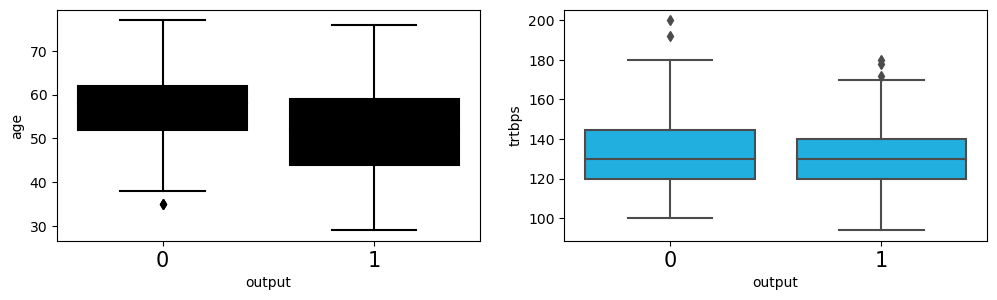

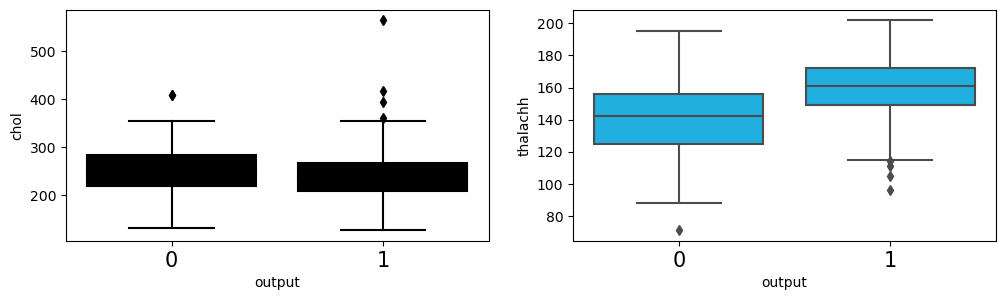

In [13]:
i = 0
while i<4:
    fig = plt.figure(figsize = [12,3])
    plt.subplot(1,2,1)   
    sns.boxplot(x = 'output',y=numerical[i], data=df , color = 'black') 
    plt.xticks(fontsize=15)
    plt.xlabel('output',fontsize=10)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = 'output',y=numerical[i], data=df , color ='deepskyblue') 
    plt.xticks(fontsize=15)
    plt.xlabel('output',fontsize=10)
    i += 1
    plt.show()

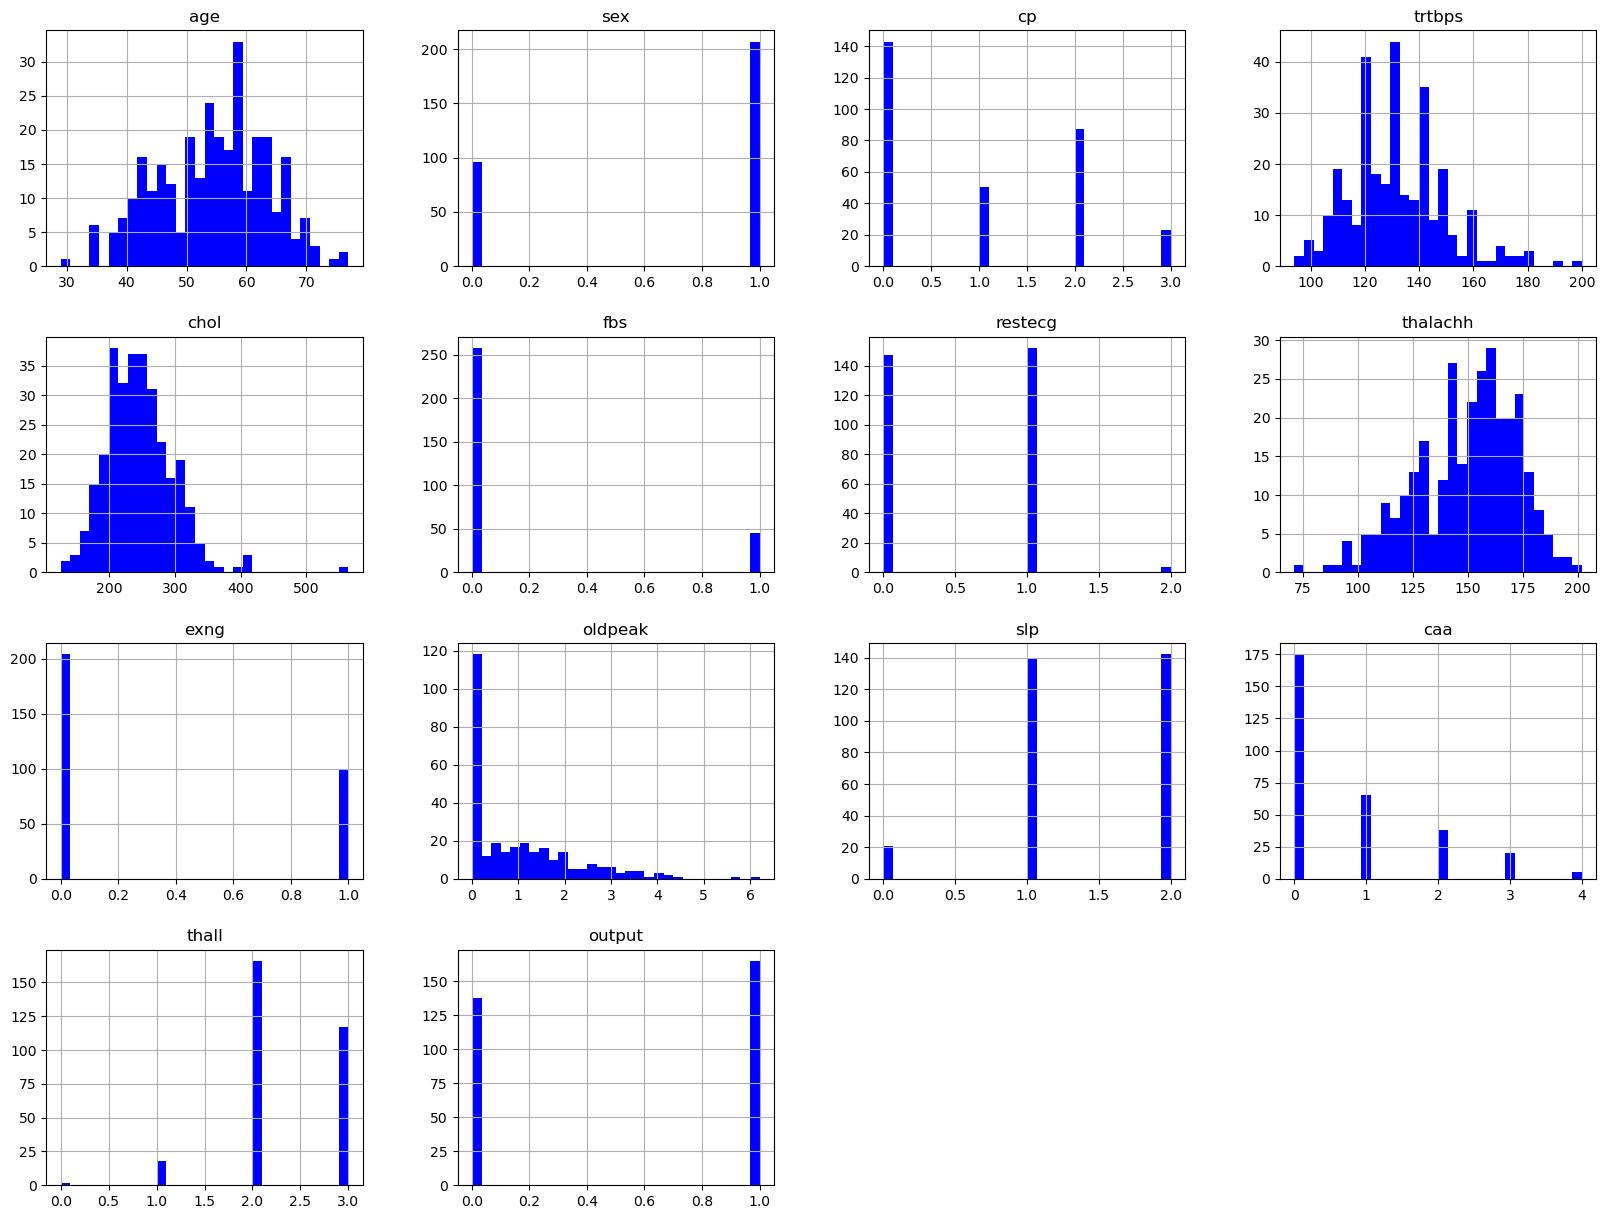

In [14]:
df.hist(bins=30 , figsize =(20 ,15) , color ="b")
plt.show()

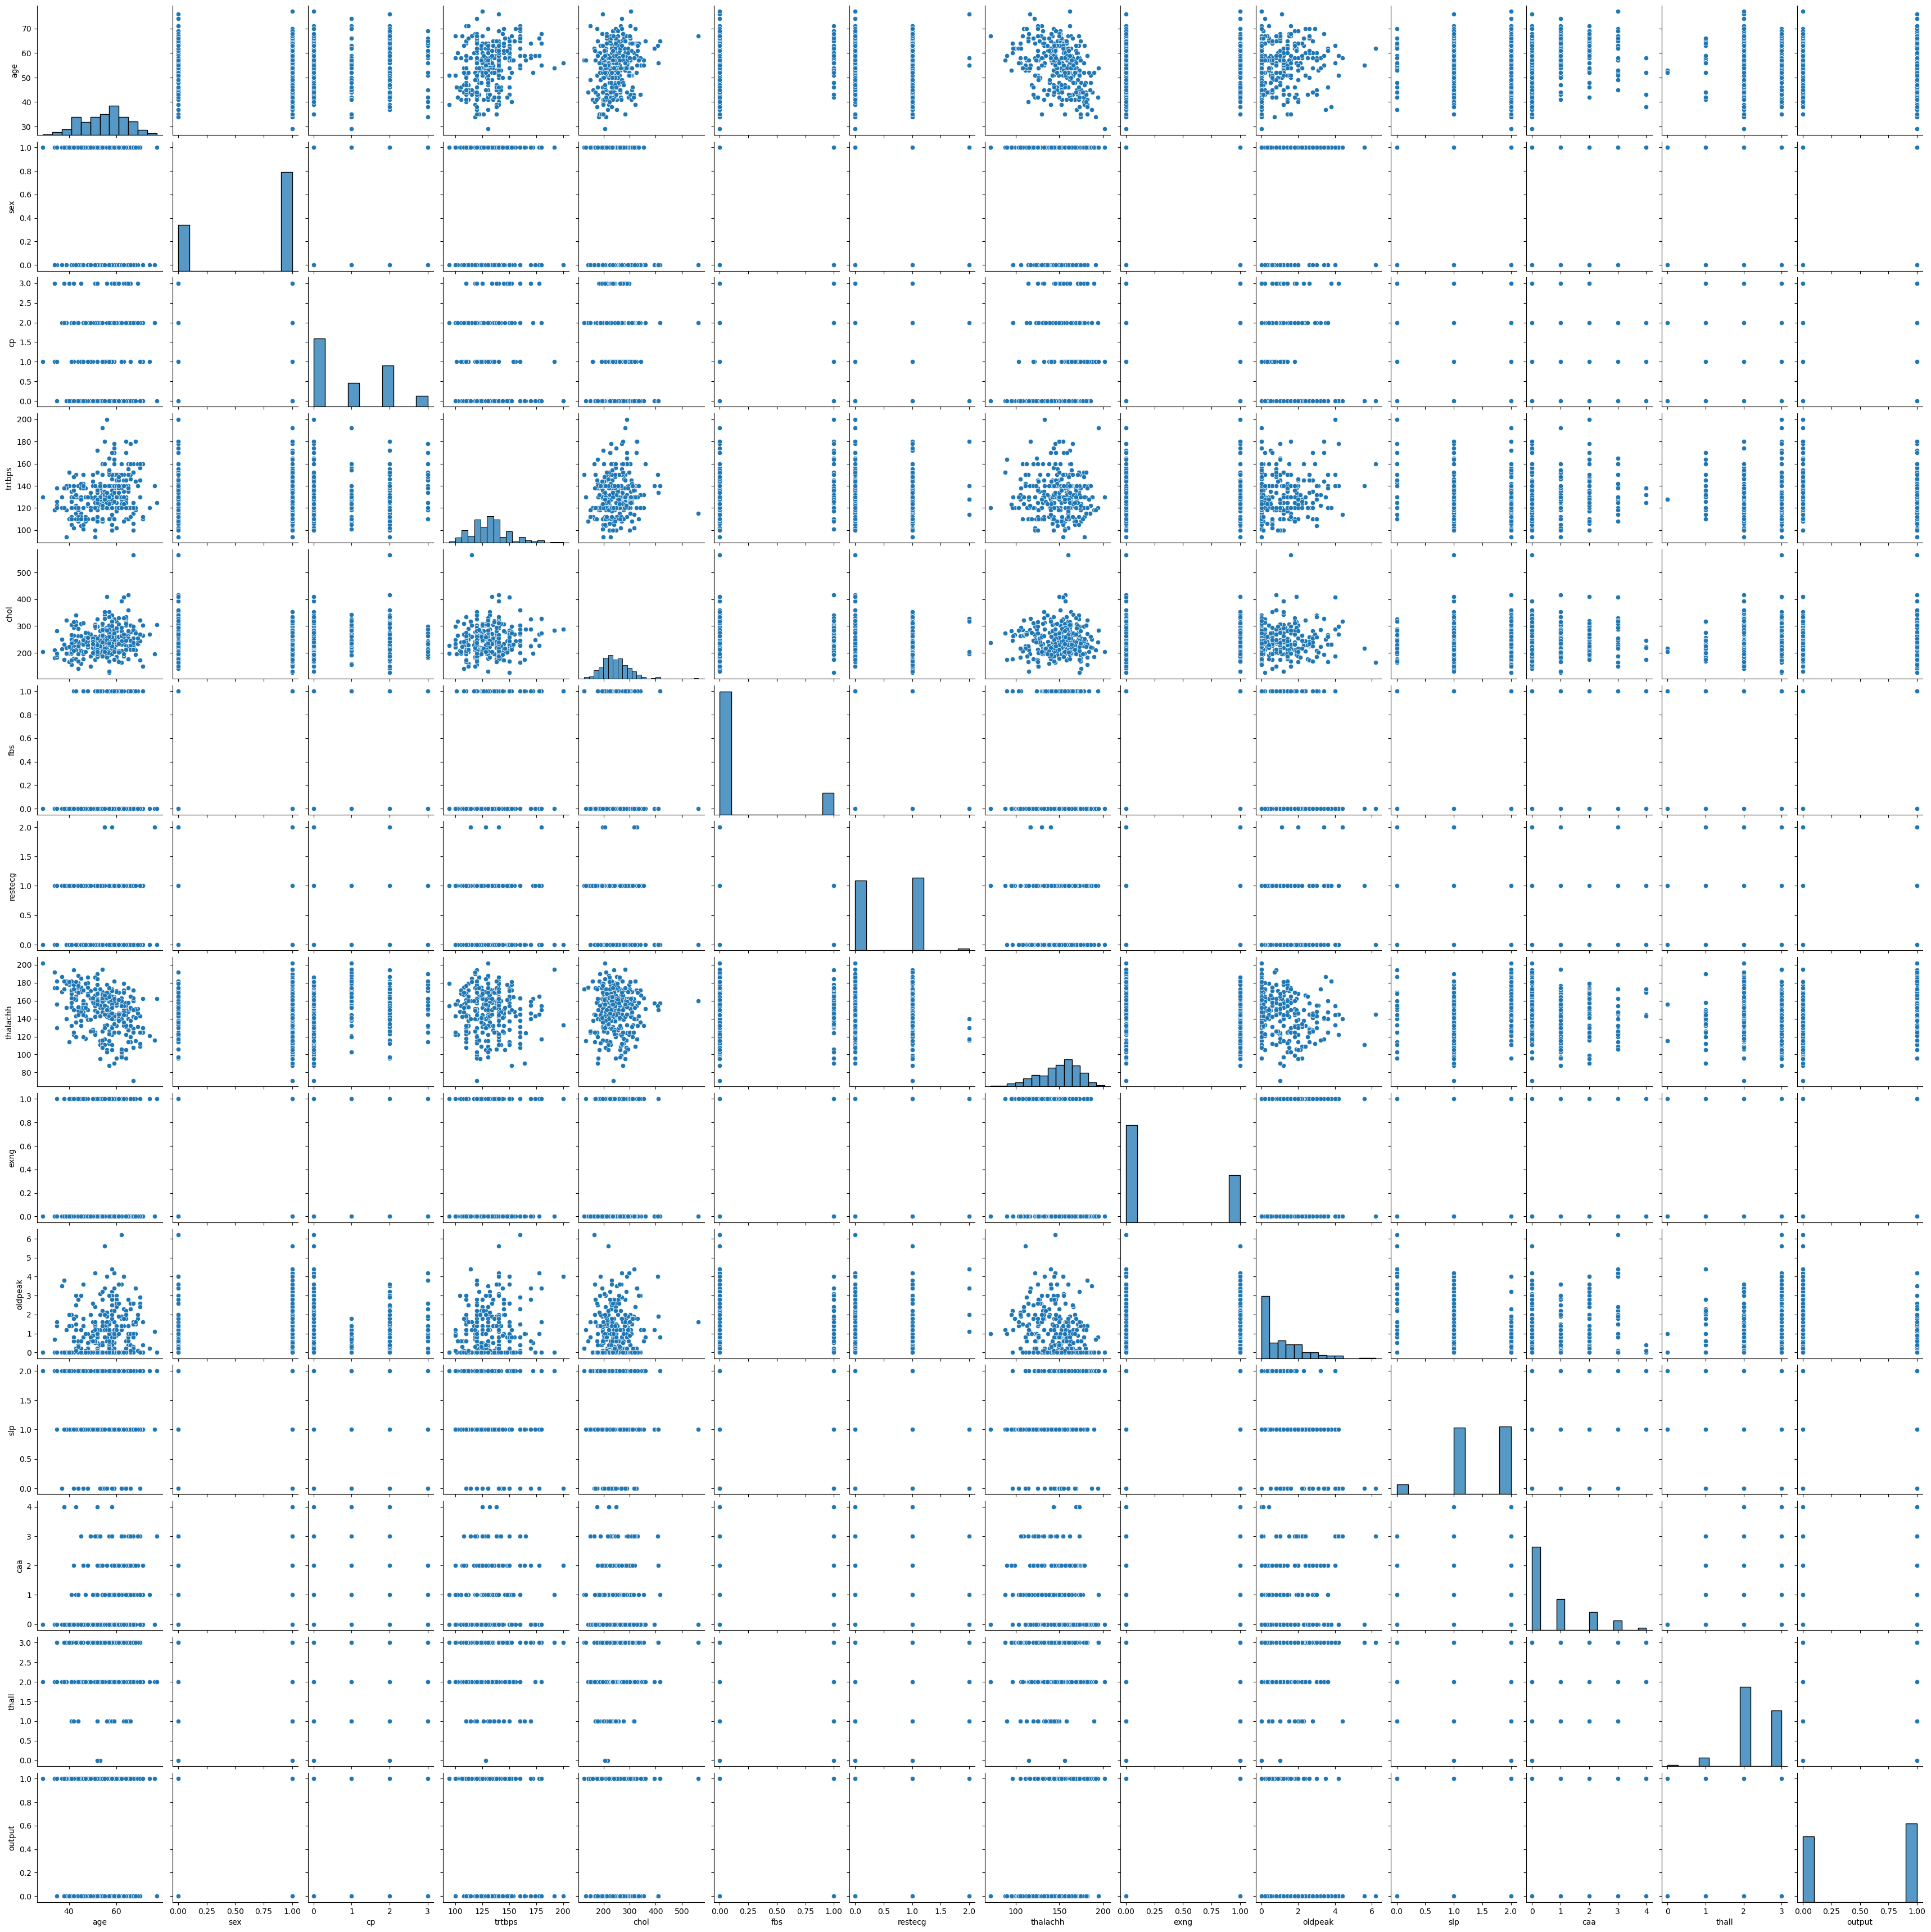

In [15]:
sns.pairplot(df)


<AxesSubplot:>

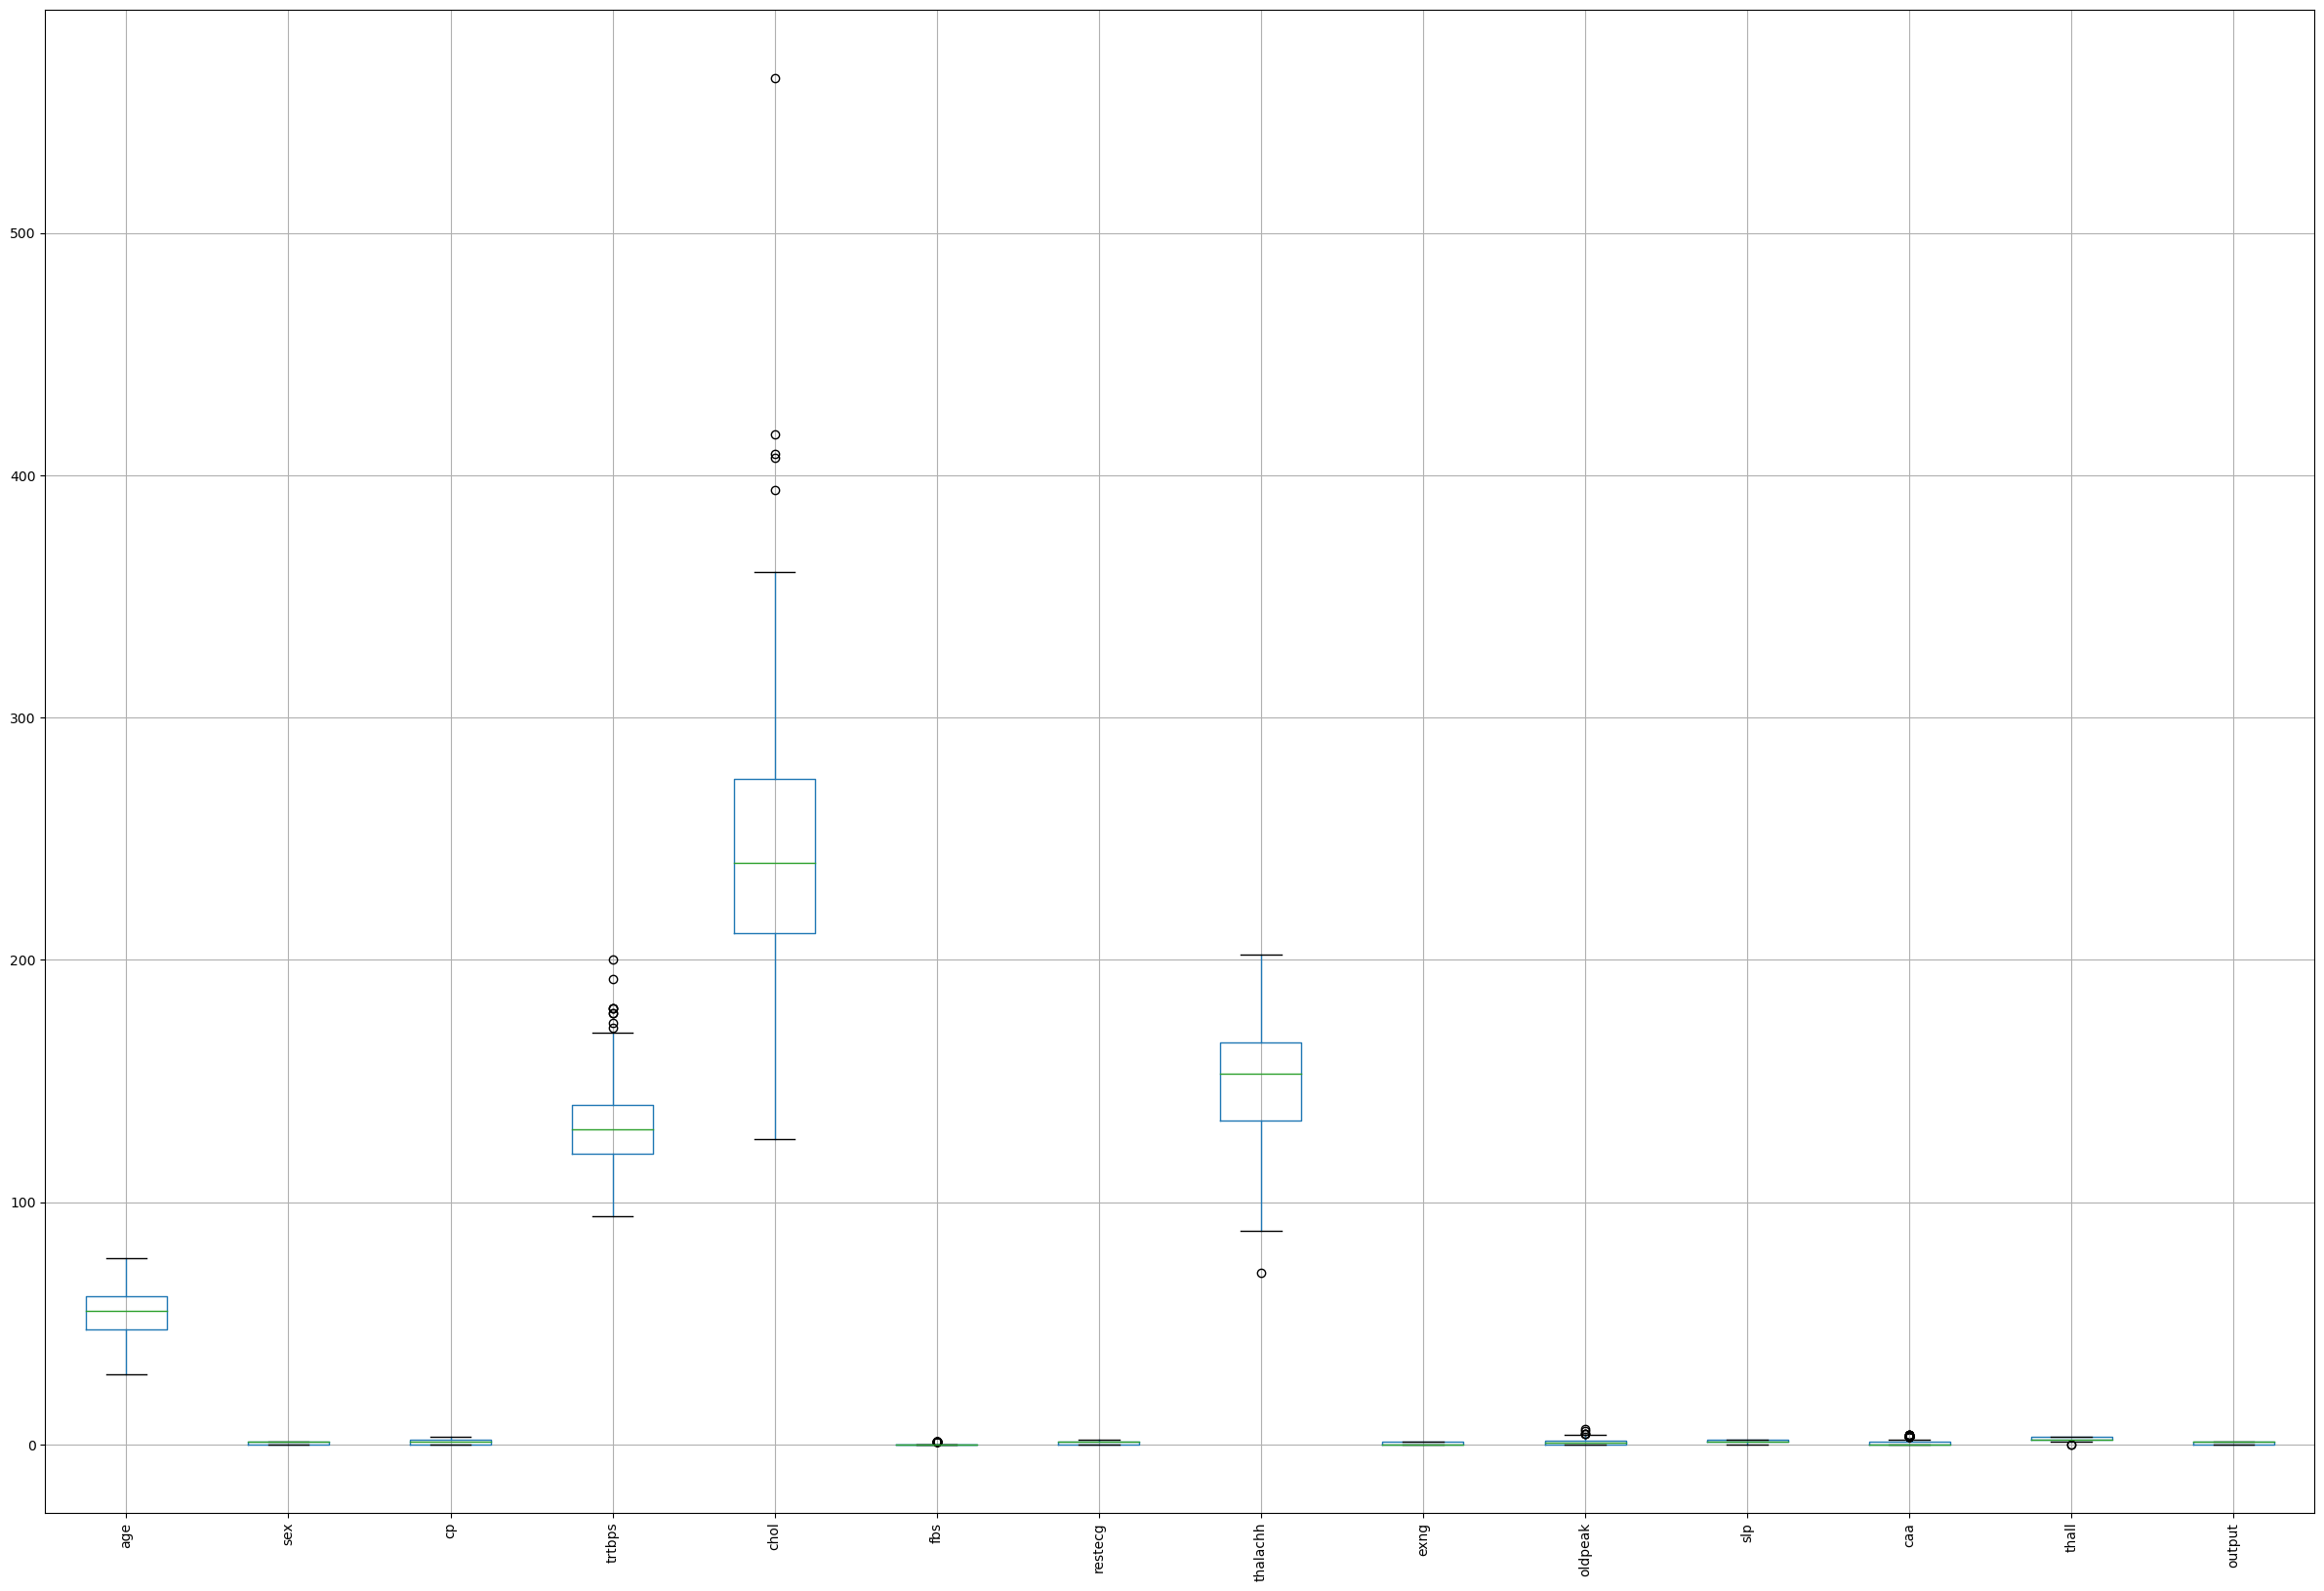

In [16]:
df.boxplot(rot=90 , figsize = (30,20) )

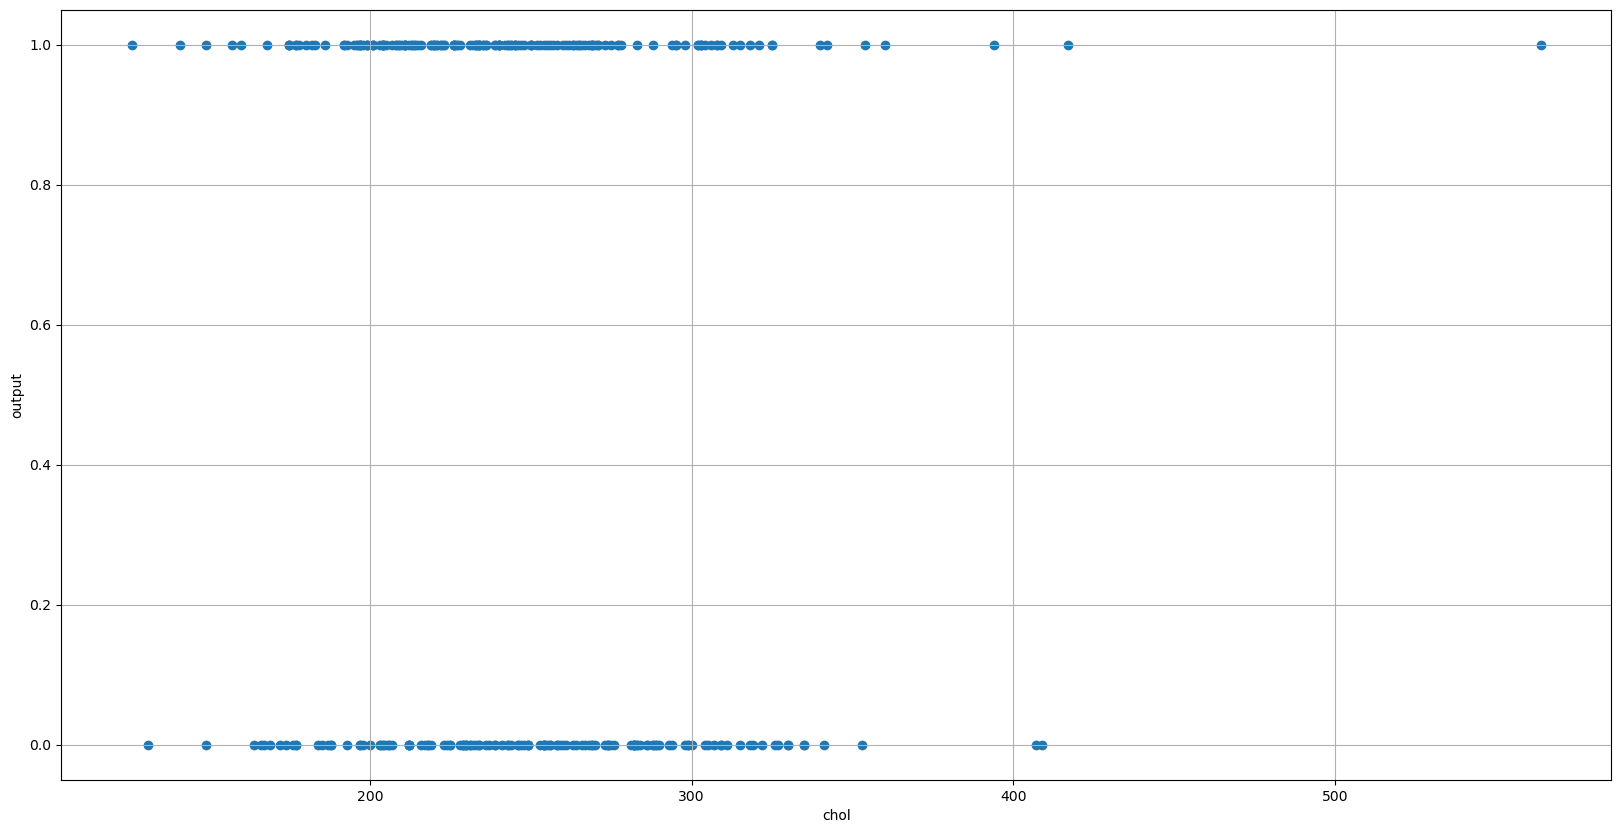

In [17]:
plt.figure( figsize = (20, 10))
plt.scatter (df ["chol"] , df["output"])
plt.xlabel ("chol")
plt.ylabel ("output")
plt.grid()

In [18]:
df[(df["chol"] > 350)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


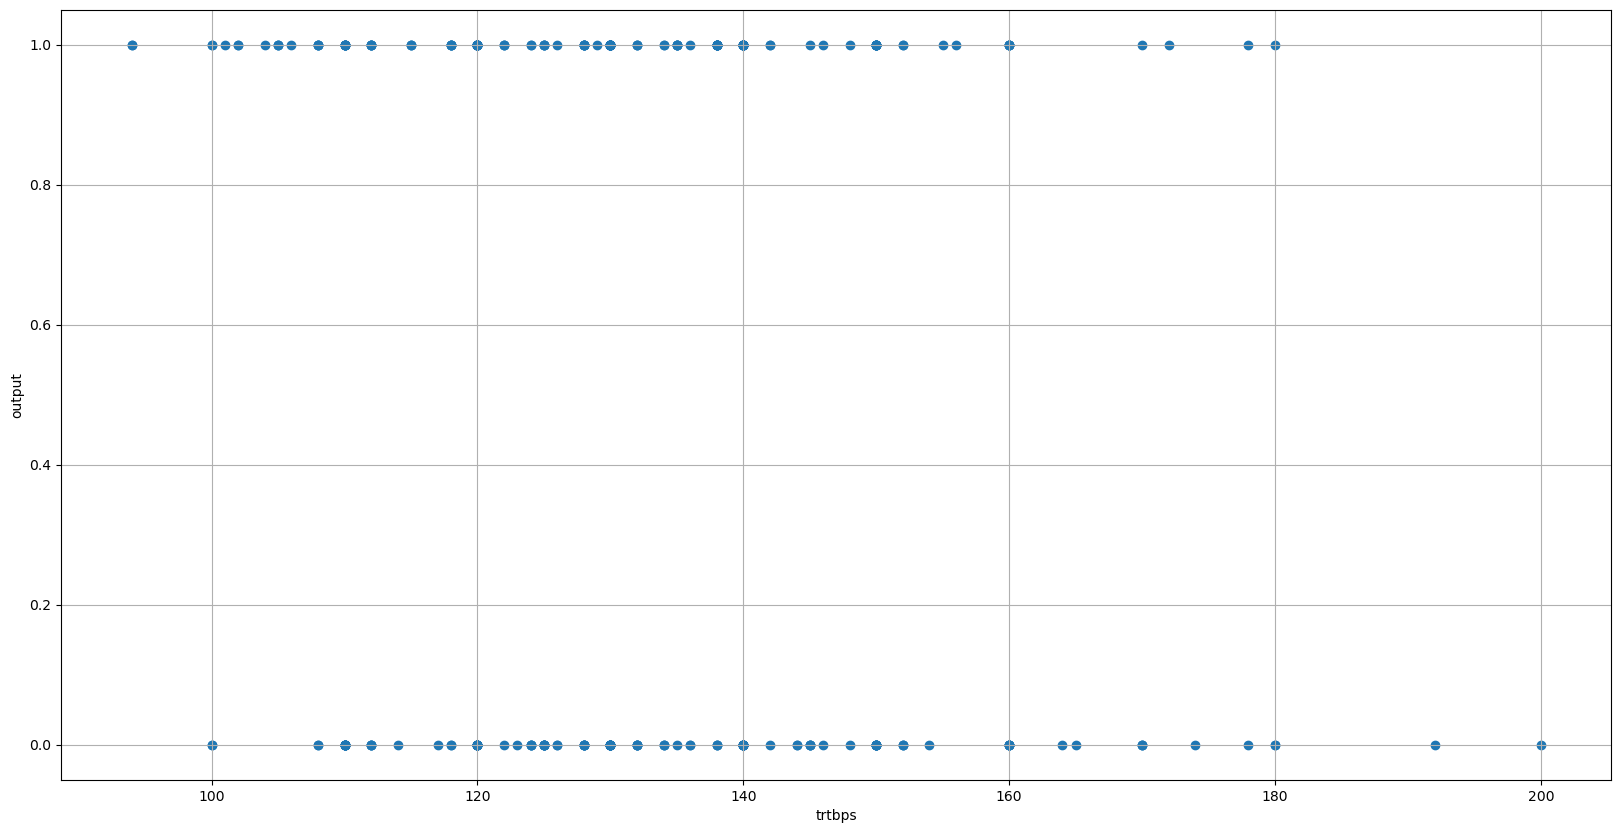

In [19]:
plt.figure(figsize =(20,10))
plt.scatter(df["trtbps"] , df["output"])
plt.xlabel("trtbps")
plt.ylabel("output")
plt.grid()

In [20]:
df[(df["trtbps"] > 170)]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [21]:
 df.drop(index =[8,101,110,203,223,241,248,260,266,4,28,39,85,96,180,220,246] , inplace=True)


In [22]:
target_0 = df[df["output"] == 0]
target_0 = pd.DataFrame (target_0)
target_1 = df[df["output"] == 1]
target_1 = pd.DataFrame(target_1)

In [23]:
target_0.sort_values(by = ['age'] , inplace = True)
target_1.sort_values (by = ['age'] , inplace = True)
print (target_0 . shape)
print(target_1 . shape)

(129, 14)
(157, 14)


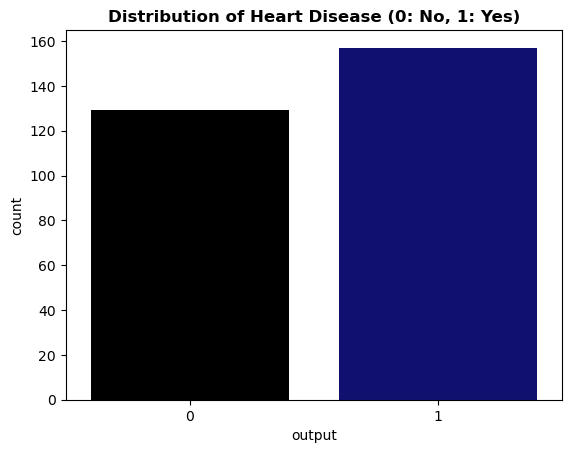

In [24]:
sns.countplot(x='output', data=df, palette=['black', 'navy'])
plt.title('Distribution of Heart Disease (0: No, 1: Yes)' , fontweight='bold')
plt.show()

In [25]:
#### pie plot

In [26]:
correlation_matrix = df.corr()

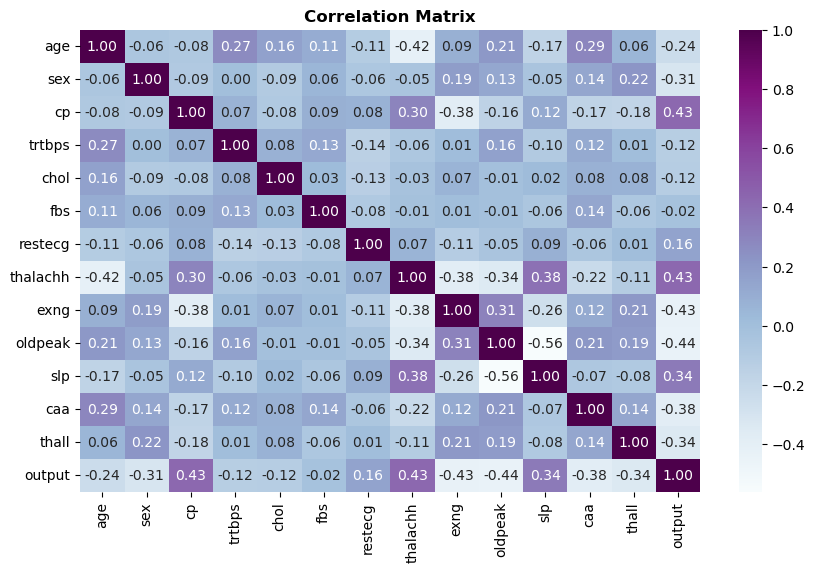

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Matrix' , fontweight='bold')
plt.show()

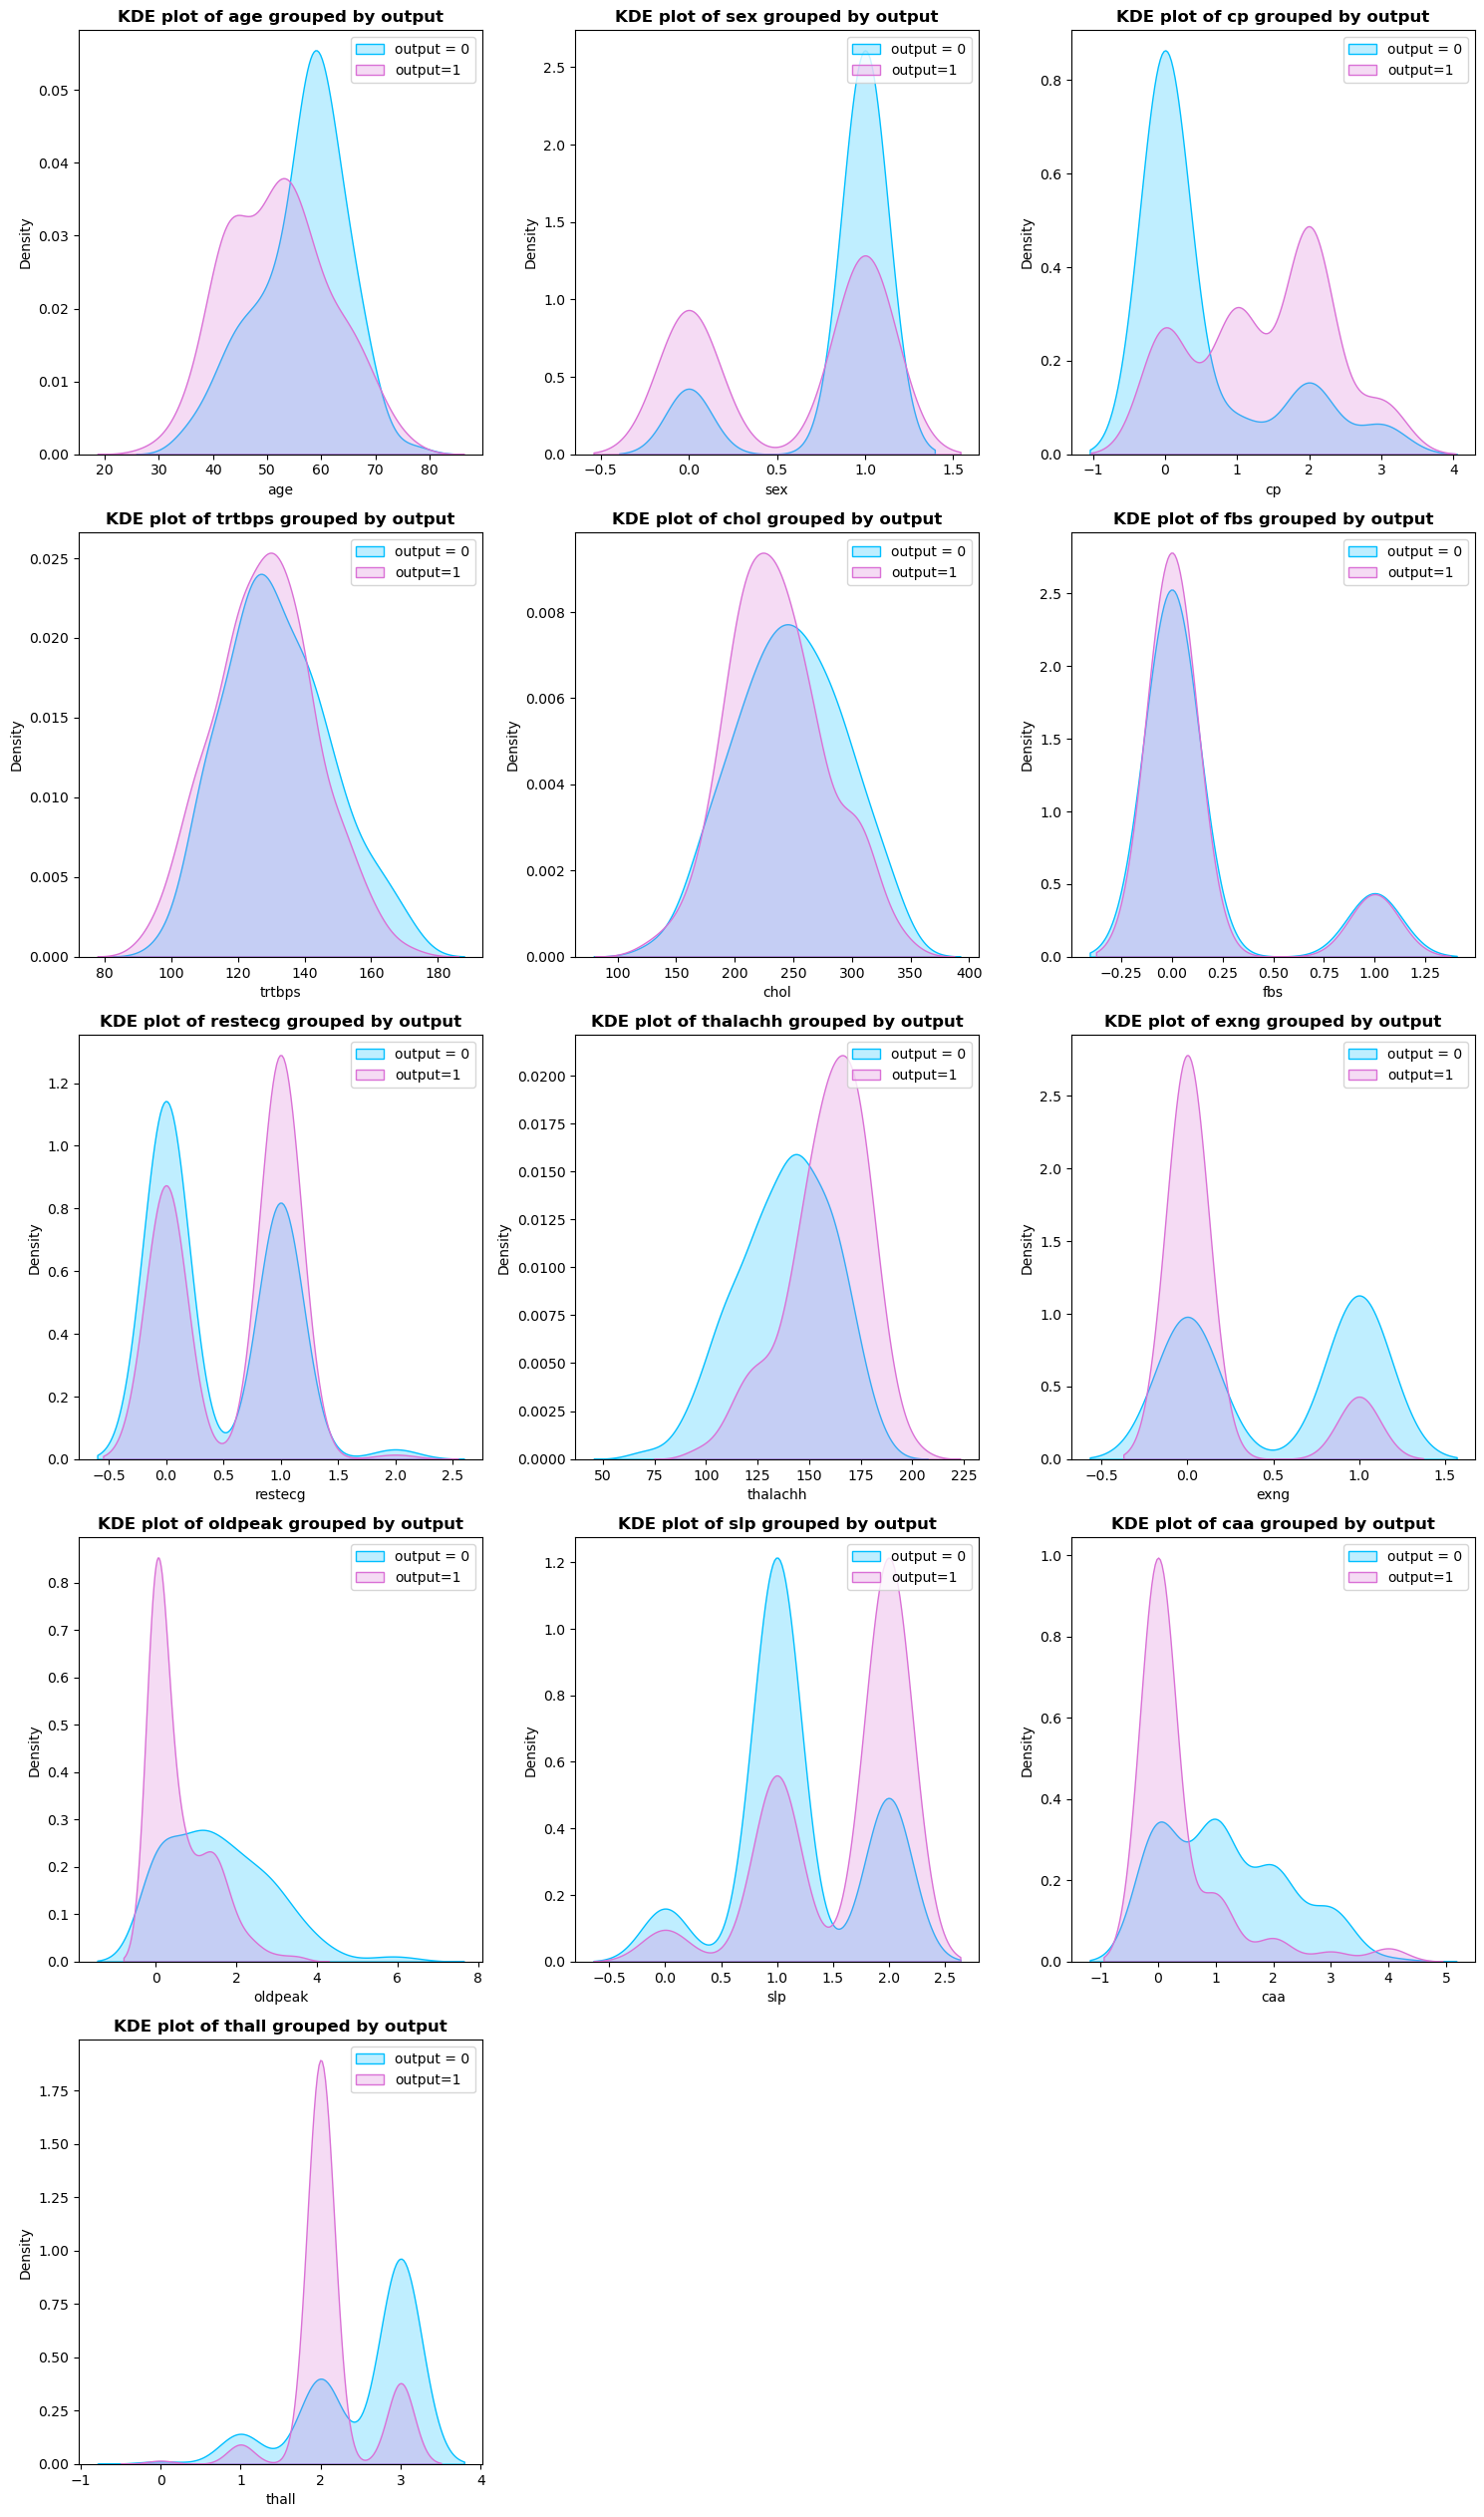

In [28]:
num_columns = len(df.columns) -1
num_rows =(num_columns +1) //2

plt.figure (figsize = (15 , 5*num_rows))

for i , column in enumerate (df.columns.drop('output')):
    plt.subplot(num_rows , 3 , i+1)
    sns.kdeplot(data=df[df['output']==0][column] , label = 'output = 0' , fill =True  , color = 'deepskyblue')
    sns.kdeplot(data =df[df['output']==1][column] , label ='output=1' , fill = True  , color ='orchid')
    plt.title(f'KDE plot of {column} grouped by output' , fontweight='bold')
    plt.legend()
plt.tight_layout()
plt.show()
    

    




Text(0.5, 1.0, 'No Heart Attack vs Heart Attack')

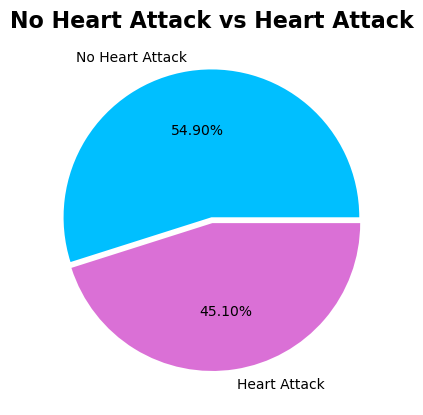

In [29]:
heart_disease = df['output'].value_counts()[1]
No_heart_diseas = df['output'].value_counts()[0]
tatal_count = len (df)
heart_disease_percentage = (heart_disease / tatal_count) * 100
No_heart_diseas_percentage = (No_heart_diseas / tatal_count) * 100

pie_values = [heart_disease_percentage , No_heart_diseas_percentage]
colors = ['deepskyblue' , 'orchid']


plt.pie(pie_values , labels=['No Heart Attack', 'Heart Attack'] , autopct='%1.2f%%' ,explode=(0.02, 0.02),colors=colors ) 
plt.title ("No Heart Attack vs Heart Attack" , color = 'black'  , fontsize = 16 , fontweight='bold')






<AxesSubplot:>

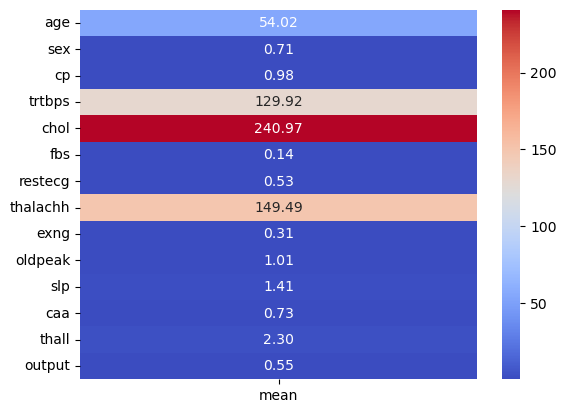

In [30]:
sns.heatmap (df.describe ().T [['mean']], annot = True, cmap = 'coolwarm', fmt = ".2f")

In [31]:
#################################################### MODEL LEARNING ########################################################

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 


In [33]:
x = df.drop(['output'] , axis = 1)
y = df["output"].values.reshape(-1,1)

In [34]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state = 42)

In [35]:
print ("x train" , x_train.shape)
print ("x test" , x_test.shape)
print ("y train" , y_train.shape)
print ("y test" , y_test.shape)

x train (228, 13)
x test (58, 13)
y train (228, 1)
y test (58, 1)


In [36]:
LR = LinearRegression ()

In [37]:
LR.fit (x_train , y_train)

LinearRegression()

In [38]:
y_pred = LR.predict(x_test)

In [39]:
print('mean Absolute Error:' , metrics.mean_absolute_error(y_test , y_pred))
print('mean squared Error :' , metrics.mean_squared_error(y_test , y_pred))
print('Root mean squared Error :' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R2score:' , metrics.r2_score(y_test , y_pred))

mean Absolute Error: 0.2645139842616911
mean squared Error : 0.10576093225156184
Root mean squared Error : 0.32520905930118527
R2score: 0.5764526475068403


In [40]:
def chek (Dimension , Testsize):
    r2 =  0.5764526475068403
    for column in x :
        new_col_name = column + str(Dimension)
        new_col_val = x[column]** Dimension
        x.insert(0 , new_col_name , new_col_val)
        x_train , x_test , y_train , y_test = train_test_split (x ,y ,test_size = Testsize , random_state =42)
        new_LR = LinearRegression()
        new_LR .fit(x_train , y_train)
        y_pred = new_LR.predict(x_test)
        r2_new = metrics.r2_score(y_test , y_pred)
        
        if r2_new < r2 :
            x.drop([new_col_name] , axis = 1 , inplace = True)
        else :
                r2 = r2_new
    print  ('R2 score :', r2)       

chek(3, 0.2)
      

R2 score : 0.6213425289573452


In [41]:
x


,thall3,caa3,slp3,oldpeak3,thalachh3,sex3,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,1,0,0,12.167,3375000,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,8,0,0,42.875,6539203,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,8,0,8,2.744,5088448,0,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,8,0,8,0.512,5639752,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2
5,1,0,1,0.064,3241792,1,57,1,0,140,192,0,1,148,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,27,0,1,0.008,1860867,0,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,27,0,1,1.728,2299968,1,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,27,8,1,39.304,2803221,1,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,27,1,1,1.728,1520875,1,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [42]:
trtbps_chol = x["trtbps"]*x["chol"]
trtbps_thalachh = x["trtbps"]*x["thalachh"]
chol_thalachh = x["chol"]*x["thalachh"]
age_trtbps=x["age"]*x["trtbps"]
age_chol=x["age"]*x["chol"]
age_thalachh = x["age"]*x["thalachh"]
oldpeak3_thalachh3 = x["oldpeak3"]*x["thalachh3"]
thall3_thalachh3=x["thall3"]*x["thalachh3"]
oldpeak3_thall3 = x["oldpeak3"]*x["thall3"]


In [43]:
x.insert(0 , "trtbps_chol", trtbps_chol)
x.insert(0 , "trtbps_thalachh", trtbps_thalachh)
x.insert(0 , "chol_thalachh", chol_thalachh)
x.insert(0 , "age_trtbps", age_trtbps)
x.insert(0 , "age_chol", age_chol)
x.insert(0 , "age_thalachh", age_thalachh)
x.insert(0 , "oldpeak3_thalachh3", oldpeak3_thalachh3)
x.insert(0 , "thall3_thalachh3", thall3_thalachh3)
x.insert(0 , "oldpeak3_thall3", oldpeak3_thall3)

In [44]:
x

,oldpeak3_thall3,thall3_thalachh3,oldpeak3_thalachh3,age_thalachh,age_chol,age_trtbps,chol_thalachh,trtbps_thalachh,trtbps_chol,thall3,...,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,12.167,3375000,4.106362e+07,9450,14679,9135,34950,21750,33785,1,...,145,233,1,0,150,0,2.3,0,0,1
1,343.000,52313624,2.803683e+08,6919,9250,4810,46750,24310,32500,8,...,130,250,0,1,187,0,3.5,0,0,2
2,21.952,40707584,1.396270e+07,7052,8364,5330,35088,22360,26520,8,...,130,204,0,0,172,0,1.4,2,0,2
3,4.096,45118016,2.887553e+06,9968,13216,6720,42008,21360,28320,8,...,120,236,0,1,178,0,0.8,2,0,2
5,0.064,3241792,2.074747e+05,8436,10944,7980,28416,20720,26880,1,...,140,192,0,1,148,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.216,50243409,1.488694e+04,7011,13737,7980,29643,17220,33740,27,...,140,241,0,1,123,1,0.2,1,0,3
299,46.656,62099136,3.974345e+06,5940,11880,4950,34848,14520,29040,27,...,110,264,0,1,132,0,1.2,1,0,3
300,1061.208,75686967,1.101778e+08,9588,13124,9792,27213,20304,27792,27,...,144,193,1,1,141,0,3.4,1,2,3
301,46.656,41063625,2.628072e+06,6555,7467,7410,15065,14950,17030,27,...,130,131,0,1,115,1,1.2,1,1,3


In [46]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state = 42)
LR1 = LinearRegression ()
LR1.fit (x_train , y_train)
y_pred = LR1.predict(x_test)

In [47]:
print('mean Absolute Error:' , metrics.mean_absolute_error(y_test , y_pred))
print('mean squared Error :' , metrics.mean_squared_error(y_test , y_pred))
print('Root mean squared Error :' , np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
print('R2score:' , metrics.r2_score(y_test , y_pred))

mean Absolute Error: 0.24676309059094048
mean squared Error : 0.09736617424302181
Root mean squared Error : 0.31203553362240943
R2score: 0.6100716545791365


In [48]:
####### SVM ######

In [49]:
xS = df.drop(['output'] , axis = 1)
yS = df['output'].values .reshape(-1,1)
yS = yS.ravel()
x_train , x_test , y_train , y_test = train_test_split(xS , yS ,test_size= 0.2 , random_state=42)
svm = SVC (kernel='linear', C=1, random_state=42)
svm . fit(x_train , y_train)
y_preds = svm . predict(x_test)
acc = metrics . accuracy_score(y_test , y_preds)
print(acc)


0.896551724137931


In [50]:
##########################           SVM With hyper-parameter            ###########################
svm = SVC()


parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(x_train, y_train)

print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

y_pred2 = searcher.predict(x_test)
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred2))

The best params are : {'C': 8, 'gamma': 0.0005}
The best score is   : 0.6973913043478261
The test accuracy score of SVM after hyper-parameter tuning is  0.6724137931034483


In [51]:
########## Random Forest ##########

In [52]:
xR = df.drop(['output'] , axis = 1)
yR = df['output'].values .reshape(-1,1)
x_train , x_test , y_train , y_test = train_test_split(xR , yR ,test_size= 0.2 , random_state=42)
rfc = RandomForestClassifier(n_estimators=350,criterion='entropy',max_depth=45)
y_train = y_train.ravel()
rfcmodel = rfc.fit(x_train,y_train)
score = rfcmodel.score(x_test,y_test)
print(score)


0.896551724137931


In [53]:
##############  Logistic Regression  ###############

In [54]:
xL = df.drop(['output'] , axis = 1)
yL = df['output'].values .reshape(-1,1)
x_train , x_test , y_train , y_test = train_test_split(xL , yL ,test_size= 0.2 , random_state=42)
log = LogisticRegression()
y_train = y_train.ravel()
logmodel = log.fit(x_train,y_train)
score = logmodel.score(x_test,y_test)
print(score)


0.896551724137931


C:\Users\iran\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


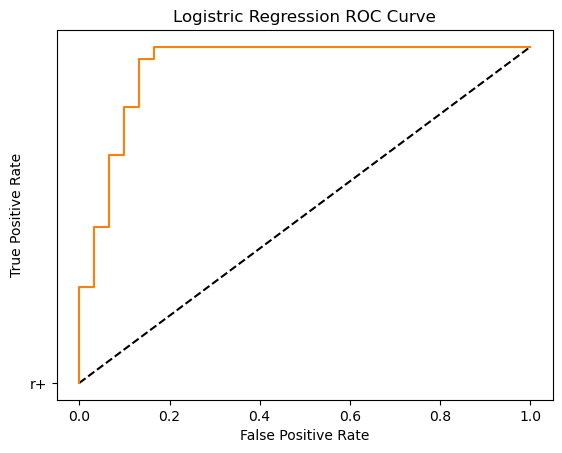

In [55]:
##### ROC Curve ######
y_pred_prob = log.predict_proba(x_test)[:,1]

# instantiating the roc_cruve
fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

# plotting the curve
plt.plot([0,1],[0,1],"k--",'r+')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

In [56]:
###############  Decision TreeClassifier  ################

In [57]:
xT = df.drop(['output'] , axis = 1)
yT = df['output'].values .reshape(-1,1)
x_train , x_test , y_train , y_test = train_test_split(xT , yT ,test_size= 0.2 , random_state=42)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5,random_state=30)
treemodel =Tree.fit(x_train,y_train)
score = treemodel.score(x_test,y_test)
print(score)



0.8620689655172413


In [58]:

#################   LogisticRegression after  standardscaler  ##############

In [59]:
xP = df.drop(['output'] , axis = 1)
yP = df['output'].values .reshape(-1,1)
x_train , x_test , y_train , y_test = train_test_split(xP , yP ,test_size= 0.2 , random_state=42)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', MinMaxScaler()),('LogisticRegression', LogisticRegression())])
pipe.score(x_test, y_test)

C:\Users\iran\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9137931034482759

In [60]:
###############   Gradient Boosting Classifier   ################

In [61]:
# instantiate the classifier
gbt = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)
y_train = y_train.ravel()
# fitting the model
gbt.fit(x_train,y_train)

# predicting values
y_pred = gbt.predict(x_test)

print("The test accuracy score of Gradient Boosting Classifier is ", accuracy_score(y_test, y_pred))



The test accuracy score of Gradient Boosting Classifier is  0.896551724137931


In [62]:
###################           Confusion Matrix        ###############

In [63]:
svm.fit(x_train, y_train)
y_predsvm = svm.predict(x_test)
confusion_matrix(y_test,y_predsvm)

array([[15, 15],
       [ 2, 26]], dtype=int64)

In [64]:
y_predrfc = rfcmodel.predict(x_test)
confusion_matrix(y_test,y_predrfc)

array([[25,  5],
       [ 1, 27]], dtype=int64)

In [65]:
y_predtree = treemodel.predict(x_test)
confusion_matrix(y_test,y_predtree)

array([[22,  8],
       [ 0, 28]], dtype=int64)

In [66]:
y_predlog = logmodel.predict(x_test)
confusion_matrix(y_test,y_predlog)

array([[24,  6],
       [ 0, 28]], dtype=int64)

In [67]:
y_predgbt = gbt.predict(x_test)
confusion_matrix(y_test,y_predgbt)

array([[24,  6],
       [ 0, 28]], dtype=int64)

In [68]:
LR_Accuracy_Score = accuracy_score(y_test,y_predlog)
LR_JaccardIndex = jaccard_score(y_test,y_predlog)
LR_F1_Score = f1_score(y_test,y_predlog)
LR_Log_Loss = log_loss(y_test,y_predlog)

In [69]:
print(f"LR_Accuracy_Score is :{LR_Accuracy_Score},LR_JaccardIndex is :{LR_JaccardIndex},LR_F1_Score is :{LR_F1_Score},LR_Log_Loss is :{LR_Log_Loss}")

LR_Accuracy_Score is :0.896551724137931,LR_JaccardIndex is :0.8235294117647058,LR_F1_Score is :0.9032258064516129,LR_Log_Loss is :3.5730595854145744


In [70]:
SVM_Accuracy_Score = accuracy_score(y_test,y_preds)
SVM_JaccardIndex = jaccard_score(y_test,y_predsvm)
SVM_F1_Score = f1_score(y_test,y_predsvm)

In [71]:
print(f"SVM_Accuracy_Score is :{SVM_Accuracy_Score},SVM_JaccardIndex is :{SVM_JaccardIndex},SVM_F1_Score is :{SVM_F1_Score}")

SVM_Accuracy_Score is :0.896551724137931,SVM_JaccardIndex is :0.6046511627906976,SVM_F1_Score is :0.7536231884057972


In [72]:
RFC_Accuracy_Score = accuracy_score(y_test,y_predrfc)
RFC_JaccardIndex = jaccard_score(y_test,y_predrfc)
RFC_F1_Score = f1_score(y_test,y_predrfc)

In [73]:
print(f"RFC_Accuracy_Score is :{RFC_Accuracy_Score},RFC_JaccardIndex is :{RFC_JaccardIndex},RFC_F1_Score is :{RFC_F1_Score}")

RFC_Accuracy_Score is :0.896551724137931,RFC_JaccardIndex is :0.8181818181818182,RFC_F1_Score is :0.8999999999999999


In [74]:
Tree_Accuracy_Score = accuracy_score(y_test,y_predtree)
Tree_JaccardIndex = jaccard_score(y_test,y_predtree)
Tree_F1_Score = f1_score(y_test,y_predtree)

In [75]:
print(f"Tree_Accuracy_Score is :{Tree_Accuracy_Score},Tree_JaccardIndex is :{Tree_JaccardIndex},Tree_F1_Score is :{Tree_F1_Score}")

Tree_Accuracy_Score is :0.8620689655172413,Tree_JaccardIndex is :0.7777777777777778,Tree_F1_Score is :0.8750000000000001


In [76]:
d = {
     'Tree':[Tree_Accuracy_Score, Tree_JaccardIndex, Tree_F1_Score,'-'],
     'LR':[LR_Accuracy_Score, LR_JaccardIndex, LR_F1_Score,LR_Log_Loss],
     'SVM':[SVM_Accuracy_Score, SVM_JaccardIndex, SVM_F1_Score,'-'],
     'RFC':[RFC_Accuracy_Score, RFC_JaccardIndex, RFC_F1_Score,'-']}
Report = pd.DataFrame(data=d, index = ['Accuracy','Jaccard Index','F1-Score','Log Loss']).T
print(tabulate(Report, headers = 'keys', tablefmt = 'psql'))

+------+------------+-----------------+------------+--------------------+
|      |   Accuracy |   Jaccard Index |   F1-Score | Log Loss           |
|------+------------+-----------------+------------+--------------------|
| Tree |   0.862069 |        0.777778 |   0.875    | -                  |
| LR   |   0.896552 |        0.823529 |   0.903226 | 3.5730595854145744 |
| SVM  |   0.896552 |        0.604651 |   0.753623 | -                  |
| RFC  |   0.896552 |        0.818182 |   0.9      | -                  |
+------+------------+-----------------+------------+--------------------+
